## 확률과 통계 Term Project
#### 제출자: [정하원]
#### 학번: [202233149]
#### 날짜: [2025-06-04]

## 1. 데이터 탐색 및 전처리

#### 1.1. 데이터 불러오기 및 사용 변수 제한

(문제 해결 과정)

영화 데이터셋(tmdb_5000_movies.csv)을 활용하여 유의미한 통계 분석을 위한 사전 전처리 작업을 수행했습니다. 분석에 필요한 변수들을 선택하고 결측치를 제거하는 과정에 중점을 두었습니다.

- 데이터 불러오기: pandas 라이브러리를 사용하여 CSV 파일을 DataFrame으로 불러왔습니다.
- 필요한 변수 선택: 분석에 필요한 6개의 변수(revenue, budget, runtime, vote_average, vote_count, popularity)를 선택하여 작업 효율성을 높였습니다.

In [1]:
# 판다스 라이브러리를 pd라는 별칭으로 불러옴.
import pandas as pd

# CSV 파일을 DataFrame 형식으로 읽어와 movies_df에 저장.
movies_df = pd.read_csv('tmdb_5000_movies.csv')

# 분석에 사용할 열 이름들을 리스트 형태로 정의.
selected_cols = ['revenue', 'budget', 'runtime', 'vote_average', 'vote_count', 'popularity'] 
# 변수 selected_cols의 연계 사용: 이 변수는 코드 전반에서 반복되는 열 선택 작업을 단순화시켜줍니다. 
# 코드 유지보수성이 높아지고, 이후에 진행될 '데이터 구조 확인', '결측치 처리' 절차에서 효율적인 코딩이 가능해지도록 하였습니다.

# 데이터 불러오기 및 사용 변수 제한
print("📥 <데이터 불러오기 및 사용 변수 제한>")

# 선택한 열만 출력 (Jupyter 환경에서 display 함수 활용)
display(movies_df[selected_cols])
# display() 함수의 사용:  display()는 출력 결과를 더 보기 좋게 렌더링해줍니다. 
# 특히 Jupyter 환경에서는 DataFrame을 표 형태로 깔끔하게 시각화하여 분석 편의성을 높여줍니다. 
# print() 함수와 달리 데이터가 잘리는 부분 없이 모든 내용을 한눈에 확인할 수 있다는 장점이 있어 사용하였습니다.

📥 <데이터 불러오기 및 사용 변수 제한>


,revenue,budget,runtime,vote_average,vote_count,popularity
0,2787965087,237000000,162.0,7.2,11800,150.437577
1,961000000,300000000,169.0,6.9,4500,139.082615
2,880674609,245000000,148.0,6.3,4466,107.376788
3,1084939099,250000000,165.0,7.6,9106,112.312950
4,284139100,260000000,132.0,6.1,2124,43.926995
...,...,...,...,...,...,...
4798,2040920,220000,81.0,6.6,238,14.269792
4799,0,9000,85.0,5.9,5,0.642552
4800,0,0,120.0,7.0,6,1.444476
4801,0,0,98.0,5.7,7,0.857008


#### 1.2. 데이터 구조 확인

(문제 해결 과정)

- 데이터 구조 확인: 선택한 변수의 첫 5행을 출력하고, 요약 통계량을 확인하여 데이터의 분포와 특성을 파악하도록 했습니다.

In [2]:
# Jupyter 환경 코드셀 이용: Jupyter 환경에서 셀 단위 실행으로 이전 코드 상태(변수, 라이브러리 등)를 유지하며 
# 유연한 개발이 가능하도록 할 수 있다는 정보를 얻어 불필요한 코드 사용을 줄여 바로 필요한 정보의 코드만 출력하도록 했습니다.
# 이후 셀 작성 시에도 동일한 방식으로 진행하여 불필요한 코드 작성은 하지 않겠습니다.

# 데이터 구조 확인
print("🔍 <데이터 구조 확인>")
print()

# 첫 5행 출력
print("📄 첫 5행 미리보기:")
display(movies_df[selected_cols].head())
# movies_df[selected_cols]는 movies_df 데이터프레임에서 selected_cols 리스트에 명시된 열들만 선택합니다.
# .head() 함수는 이렇게 선택된 데이터의 첫 5행을 기본값으로 가져와 보여줍니다. 
print()

# 요약 통계량 출력
print("📊 요약 통계량:")
display(movies_df[selected_cols].describe())
# 마찬가지로 movies_df[selected_cols]를 통해 특정 열들을 선택합니다.
# .describe() 함수는 선택된 열들에 대한 기술 통계량을 계산하여 요약해 보여줍니다. 
# 여기에는 데이터 개수(count), 평균(mean), 표준편차(std), 최솟값(min), 사분위수(25%, 50%, 75%), 최댓값(max) 등이 포함됩니다.

🔍 <데이터 구조 확인>

📄 첫 5행 미리보기:


,revenue,budget,runtime,vote_average,vote_count,popularity
0,2787965087,237000000,162.0,7.2,11800,150.437577
1,961000000,300000000,169.0,6.9,4500,139.082615
2,880674609,245000000,148.0,6.3,4466,107.376788
3,1084939099,250000000,165.0,7.6,9106,112.312950
4,284139100,260000000,132.0,6.1,2124,43.926995



📊 요약 통계량:


,revenue,budget,runtime,vote_average,vote_count,popularity
count,4.803000e+03,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000
mean,8.226064e+07,2.904504e+07,106.875859,6.092172,690.217989,21.492301
std,1.628571e+08,4.072239e+07,22.611935,1.194612,1234.585891,31.816650
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,7.900000e+05,94.000000,5.600000,54.000000,4.668070
50%,1.917000e+07,1.500000e+07,103.000000,6.200000,235.000000,12.921594
75%,9.291719e+07,4.000000e+07,118.000000,6.800000,737.000000,28.313505
max,2.787965e+09,3.800000e+08,338.000000,10.000000,13752.000000,875.581305


#### 1.3. 결측치 처리 및 데이터 크기 확인

(문제 해결 과정)

tmdb 데이터에서 실제 NaN값뿐만 아니라, 수치형 0값을 포함하여 결측치 여부를 판단하였습니다. 다음은 6개 주요 컬럼의 0값에 대한 해석과 처리 결정입니다.
 - 수익과 예산:
   
   수익이 0이고 예산이 0인 경우, 그리고 예산이 0인데 수익이 존재하는 경우는 명백한 결측치로 판단하여 제거했습니다. 예산은 있으나 수익이 0인 경우는 정보 누락 또는 실제 흥행 실패를 의미할 수 있어 단정하기 어려웠습니다. 총 537개의 데이터를 확인하였고 해당 자료는 셀을 추가하여 확인하였습니다. 그럼에도 불구하고, 해당 데이터를 제거하기로 결정한 이유는 회귀 모델의 유효한 계수 추정과 유의미한 변수 간 관계를 파악하기 위함입니다. 이는 해석 가능한 예측 모델 구축에 있어 정보 손실 위험보다 이점이 더 크다고 판단하여 내린 결정입니다. 따라서, 수익과 예산의 0값은 모두 결측치로 변환하였고 movies_df_selected.dropna()를 활용해 실제 NaN값과 함께 제거하였습니다.  
 
 - 투표 수와 평균 평점:
   
   투표 수 0인데 평균 평점이 존재하는(0이 아닌) 경우는 데이터 오류로 의심하여 확인했으나, 해당하는 데이터가 없음을 추가된 셀에서 확인하였습니다. 이는 투표 수가 0인 모든 영화는 평균 평점도 0임을 의미합니다. 투표 수 0, 평균 평점 0인 데이터는 실제 평가 정보가 부재한 상태이므로, 유의미한 평점 데이터로 간주하기 어렵다고 판단하여 제거했습니다. 한편, 투표 수는 존재하나 평균 평점이 0인 데이터는 1개였습니다. (이는 평균 평점이 0인 전체 데이터 63개 중, 앞서 언급된 '투표 수 0, 평균 평점 0'인 데이터 62개를 제외한 수치입니다.) 이 데이터는 실제 낮은 평점을 반영할 수 있으나, 해당 영화가 수익이 0인 조건을 만족하여 앞선 수익/예산 처리 단계에서 이미 제거되었음을 확인했습니다. 따라서 이 경우는 추가적인 개별 처리가 필요하지 않았습니다. 결과적으로, 평균 평점은 투표를 통해 유효하게 형성된 값들만 남게 되었습니다. 수익과 예산 컬럼과 마찬가지로, 투표 수와 평균 평점의 실제 NaN값도 movies_df_selected.dropna()를 활용해 함께 제거하였습니다. 
 
 - 그 외 컬럼:
   
   인기도가 0인 데이터는 1개 확인되었고, 결측치로 단정하기 어려워 유지했습니다. 하지만 해당 영화 또한 고민의 여지 없이 수익이 0인 조건을 만족하여 앞선 수익/예산 처리 단계에서 이미 제거되었음을 확인했습니다. 따라서 이 경우 또한 추가적인 개별 처리가 필요하지 않음을 확인하였습니다. 코드 확인 결과, 인기도가 0인 데이터 1개는 앞선 수익/예산 조건에 의해 이미 제거되었으며, 인기도 컬럼에는 (그 외) 실제 NaN값이 없음을 확인했습니다. 마지막 컬럼인 상영시간이 0인 데이터는 현실적으로 불가능하므로 제거했습니다.
 
 - 결론:

   수익과 예산, 투표 수와 평균 평점, 상영시간 등 주요 변수에서 정보 부족 또는 오류로 판단되는 0값들을 결측치로 간주하고, 실제 결측치(NaN)와 함께 제거하였습니다.
   특히 예산은 존재하나 수익이 0인 경우, 이는 흥행 실패 또는 정보 누락 두 가능성을 모두 내포하나, 모델의 해석력과 계수의 신뢰도를 높이기 위해 제거하기로 결정했습니다.이러한 전처리 과정을 통해 전체 4,803개 중 1,576개를 제거하고, 최종적으로 3,227개의 유효한 데이터셋을 확보하였습니다.

In [3]:
# 추가 자료1

# 원본 데이터프레임에서 선택한 열들만 복사하여 새로운 데이터프레임 생성
movies_df_selected = movies_df[selected_cols].copy()
# movies_df_selected에 .copy() 메서드를 사용한 이유:
# 원본 데이터프레임에서 선택한 열만 따로 복사하여 별도의 객체로 만들면,
# 원본 데이터가 훼손되지 않고 보존되어 이후 재사용 시 데이터 손실이나 오류를 방지할 수 있습니다.
# 이렇게 하면 데이터 전처리 과정에서 다양한 실험과 비교가 가능해져 분석의 유연성과 안정성을 높일 수 있습니다.


# 예산, 수익 관련
# 조건: 예산이 존재하고 수익이 0인 경우
has_budget_and_zero_revenue = movies_df_selected[(movies_df_selected['budget'] !=0 ) & (movies_df_selected['revenue'] == 0)]
# movies_df_selected['budget'] != 0: movies_df_selected 데이터프레임의 'budget' 열에서 값이 0이 아닌 행들을 선택합니다.
# movies_df_selected['revenue'] == 0: movies_df_selected 데이터프레임의 'revenue' 열에서 값이 0인 행들을 선택합니다.
# & (논리 AND 연산자): 위 두 가지 조건을 동시에 만족하는 행들을 선택합니다.
# 대괄호 []는 불리언 인덱싱(T/F 반환)을 활용해 조건에 맞는 행만 필터링하여 has_budget_and_zero_revenue에 저장합니다.

# 결과 출력
print(f"💰 예산이 존재하고 수익이 0인 행 수: {has_budget_and_zero_revenue.shape[0]} 개")
# f-스트링은 문자열 앞에 f(F)를를 붙이고, 중괄호 {} 안에 변수나 표현식을 직접 넣어 값을 문자열에 삽입합니다.
# 가독성과 간결성을 높인 파이썬 문자열 포매팅 방식으로 다른 포매팅 방법보다 실행 속도가 빨라 효율적입니다.
# .shape: 데이터프레임의 형태(차원)를 튜플 형태로 반환합니다. 예를 들어, (행의 수, 열의 수) 와 같이 나타납니다. 
# [0]: .shape의 행의 수만 가져옵니다. 
# 따라서, has_budget_and_zero_revenue.shape[0]은 불리언 조건으로 필터링된 데이터프레임에 몇 개의 행이 있는지 알려줍니다.
print()


# 투표 수, 평균 평점, 수익 관련
# 조건: 투표 수가 0인데 평균 평점이 존재하는 경우 (데이터 오류 가능성)
no_votes_but_has_rating = movies_df_selected[(movies_df_selected['vote_count'] == 0) & (movies_df_selected['vote_average'] != 0)]
# 조건: 투표 수가 0이고 평균 평점이 0인 경우
no_votes_and_zero_rating = movies_df_selected[(movies_df_selected['vote_count'] == 0) & (movies_df_selected['vote_average'] == 0)]
# 조건: 투표 수가 존재하고 평균 평점이 0인 경우
has_votes_and_zero_rating = movies_df_selected[(movies_df_selected['vote_count'] != 0) & (movies_df_selected['vote_average'] == 0)]
# 조건: 수익이 0이고 투표 수가 존재하고 평균 평점이 0인 경우
no_revenue_and_has_votes_and_zero_rating = movies_df_selected[
    (movies_df_selected['revenue'] == 0) &
    (movies_df_selected['vote_count'] != 0) &
    (movies_df_selected['vote_average'] == 0)
]
# 결과 출력
print(f"🔴 투표 수 0인데 평균 평점이 존재하는 행 수 (데이터 오류 가능성): {no_votes_but_has_rating.shape[0]}")
print(f"🟡 투표 수 0이면서 동시에 평균 평점이 0인 행 수: {no_votes_and_zero_rating.shape[0]}")
print(f"🟢 투표 수가 존재하고 평균 평점이 0인 행 수: {has_votes_and_zero_rating.shape[0]}")
print(f"🟢 수익이 0이고, 투표 수는 존재하며, 평균 평점이 0인 행 수: {no_revenue_and_has_votes_and_zero_rating.shape[0]} 개")
print()


# 인기도, 수익 관련
# 조건: 인기도가 0인 경우 (데이터 누락 가능성)
zero_popularity = movies_df_selected[movies_df_selected['popularity'] == 0]
# 결과 출력
print(f"🔥 인기도가 0인 행 수: {zero_popularity.shape[0]}")
# 수익이 0이고 인기도가 0인 경우
no_revenue_and_zero_popularity = movies_df_selected[(movies_df_selected['revenue'] == 0) & (movies_df_selected['popularity'] == 0)]
# 결과 출력
print(f"🔥 수익이 0이고 인기도가 0인 행 수: {no_revenue_and_zero_popularity.shape[0]} 개")

💰 예산이 존재하고 수익이 0인 행 수: 537 개

🔴 투표 수 0인데 평균 평점이 존재하는 행 수 (데이터 오류 가능성): 0
🟡 투표 수 0이면서 동시에 평균 평점이 0인 행 수: 62
🟢 투표 수가 존재하고 평균 평점이 0인 행 수: 1
🟢 수익이 0이고, 투표 수는 존재하며, 평균 평점이 0인 행 수: 1 개

🔥 인기도가 0인 행 수: 1
🔥 수익이 0이고 인기도가 0인 행 수: 1 개


In [4]:
# 결측치 처리 및 데이터 크기 확인
print("🗂️ <결측치 처리 및 데이터 크기 확인>")
print()

# 0을 결측치(NaN)로 처리할 컬럼 정의(서로 다른 데이터 처리 규칙을 적용할 열들을 구분하여 관리하기 위해 변수로 저장)
cols_zero_as_nan = ['revenue', 'budget', 'runtime', 'vote_average', 'vote_count']
cols_zero_keep = ['popularity']

# 처리 전 데이터 크기 출력
print(f"📦 처리 전 데이터 크기: {movies_df_selected.shape[0]} 행")
print()

# 지정된 컬럼에서 0을 NaN으로 변환
movies_df_selected[cols_zero_as_nan] = movies_df_selected[cols_zero_as_nan].replace(0, pd.NA)
# movies_df_selected 데이터프레임의 cols_zero_as_nan에 지정된 열들에서 숫자 0을 Pandas의 결측치 표시자인 pd.NA로 변경합니다.

# 전체 selected_cols에서 결측치가 있는 행 제거
movies_df_cleaned = movies_df_selected.dropna()
# movies_df_selected 데이터프레임에서 이전에 0이었다가 결측치(pd.NA 또는 np.nan)로 처리된 값들과 
# 원래부터 존재했던 실제 결측치를 포함하는 모든 행을 제거하여 movies_df_cleaned에 저장합니다.

# 컬럼별 결측치 개수 출력 (0을 NaN으로 간주한 컬럼, 아닌 컬럼, 전체)
print("📌 [0을 NaN으로 간주한 컬럼] 결측치 개수:")
print(movies_df_selected[cols_zero_as_nan].isnull().sum())
# .isnull(): 선택된 열들에서 각 값이 결측치인지 확인하여 True/False로 표시합니다.
# .sum(): 각 열별로 True의 개수, 즉 결측치의 개수를 합산합니다.
print()

print("📌 [0을 유지한 컬럼] 결측치 개수:")
print(movies_df_selected[cols_zero_keep].isnull().sum())
print()

# 처리 후 데이터 크기 출력
print(f"✅ 결측치 제거 후 데이터 크기: {movies_df_cleaned.shape[0]} 행")

🗂️ <결측치 처리 및 데이터 크기 확인>

📦 처리 전 데이터 크기: 4803 행

📌 [0을 NaN으로 간주한 컬럼] 결측치 개수:
revenue         1427
budget          1037
runtime           37
vote_average      63
vote_count        62
dtype: int64

📌 [0을 유지한 컬럼] 결측치 개수:
popularity    0
dtype: int64

✅ 결측치 제거 후 데이터 크기: 3227 행


## 2. 기술통계량 분석

#### 2.1. 모든 사용 변수의 평균, 중앙값, 표준편차 계산 및 출력

(문제 해결 과정)

이 단계에서는 수집된 영화 데이터의 기본적인 통계적 특성을 파악하고자 했습니다. 데이터의 중심 경향과 분산 정도를 측정하여 데이터에 대한 이해를 높이고, 후속 분석을 위한 기초 자료를 확보하는 데 중점을 두었습니다.
 - 중심 경향 측정: 각 변수별 평균과 중앙값을 계산하여 데이터의 중심 위치를 파악하였습니다. 이를 통해 평균과 중앙값의 차이를 비교하여 이상치의 영향을 1차적으로 평가했습니다.
 - 데이터 분포: 표준편차를 통해 데이터가 평균으로부터 얼마나 흩어져 있는지, 즉 데이터의 변동성을 측정했습니다.

In [5]:
# 모든 사용 변수의 평균, 중앙값, 표준편차 계산 및 출력
print('📊 <모든 사용 변수의 평균, 중앙값, 표준편차 계산 및 출력>')

movies_df_cleaned = movies_df_cleaned.copy()
# 데이터 프레임 movies_df_cleaned의 연계 사용: 분석 시 결측치가 포함된 데이터는 오류와 신뢰도 저하를 유발할 수 있어,
# 결측치를 제거한 movies_df_cleaned를 연이어 사용하여 정확하고 안정적인 결과를 얻고자 했습니다. 
# 이 데이터 프레임은 상관관계 분석에도 사용되며 이후 이상치 탐색과 시각화, 회귀분석에서도 계속 연계될 것입니다.

# 숫자형으로 변환할 열 목록 (이전과 동일)
cols_to_convert = ['revenue', 'budget', 'runtime', 'vote_average', 'vote_count']

# 문자열 포함 가능성 있는 열들을 숫자형으로 변환 
movies_df_cleaned[cols_to_convert] = movies_df_cleaned[cols_to_convert].apply(pd.to_numeric)
# 초기 확인 결과, 'cols_to_convert'에 지정된 열들(예: 수익, 예산, 상영 시간)이 숫자형이 아니어서,
# .apply(pd.to_numeric)를 사용하여 해당 열들의 데이터 타입을 숫자형으로 일괄 변환했습니다. 

# 변환 과정에서 pandas의 복사본/뷰(view) 문제로 인해 
# SettingWithCopyWarning 경고가 발생할 수 있다는 메시지를 받았고, 이를 사전에 방지하고 안전하게 작업하기 위해
# 데이터프레임을 이전 사용과 같이 copy() 메서드로 복사한 후 변환 작업을 진행하였습니다.
# 그 결과 경고 없이 변환 작업이 정확히 수행되도록 하였습니다.

# 평균(mean), 중앙값(50%), 표준편차(std) 출력
display(movies_df_cleaned[cols_to_convert].describe().loc[['mean', '50%', 'std']])
# describe()로 산출한 통계량 중 평균(mean), 중앙값(50%), 표준편차(std)만 선택적으로 추출합니다.  
# loc를 이용해 describe 결과에서 필요한 행만 골라 표시하는 방식입니다.
# [[]]는 데이터 프레임 형태로 반환합니다.

📊 <모든 사용 변수의 평균, 중앙값, 표준편차 계산 및 출력>


,revenue,budget,runtime,vote_average,vote_count
mean,1.213181e+08,4.067877e+07,110.720793,6.313263,977.893090
50%,5.519828e+07,2.500000e+07,107.000000,6.300000,471.000000
std,1.863361e+08,4.439974e+07,20.970364,0.859921,1414.538507


#### 2.2. 상관관계 계산 및 해석

(문제 해결 과정)

- 변수 간 관계: 수치형 변수 간의 상관관계를 분석하여, 특정 변수 간에 존재하는 선형적 관계의 강도와 방향을 파악하려 하였습니다.

In [6]:
# 상관관계 계산 및 해석
print('📈 <상관관계 계산 및 해석>')

# 선택한 열들 간의 상관관계를 계산
corr_matrix = movies_df_cleaned.corr()
# corr_matrix = movies_df_cleaned.corr(): movies_df_cleaned 데이터프레임에 있는 모든 숫자형 열들 간의 피어슨 상관계수를 계산하여, 
# 그 결과를 corr_matrix라는 새로운 데이터프레임에 저장합니다. 이 행렬의 각 셀은 두 변수 간의 선형 관계 강도와 방향을 나타냅니다.

# revenue와 자신 포함 나머지 5개 입력변수 간의 상관관계 값을 출력
corr_matrix.loc['revenue'] 


# 종속변수와 각 입력변수 간의 선형관계 해석

# revenue (수익)과 budget (제작비) 사이의 상관관계: 0.71
# -> 제작비는 수익과 비교적 강한 양의 상관관계를 가집니다. (제작비 증가는 수익 증가와 연관)

# revenue (수익)과 runtime (상영 시간) 사이의 상관관계: 0.23
# -> 상영 시간은 수익과 낮은 양의 상관관계를 가집니다. (상영 시간 증가는 수익에 미미한 영향)

# revenue (수익)과 vote_average (평균 평점) 사이의 상관관계: 0.19
# -> 평균 평점은 수익과 낮은 양의 상관관계를 가집니다. (평균 평점 증가는 수익에 미미한 영향)

# revenue (수익)과 vote_count (평점 수) 사이의 상관관계: 0.76
# -> 평점 수는 수익과 매우 강한 양의 상관관계를 가집니다. (평점 수 증가는 수익 증가와 강한 연관)

# revenue (수익)과 popularity (인기 지표) 사이의 상관관계: 0.60
# -> 인기 지표는 수익과 중간 정도의 양의 상관관계를 가집니다. (인기 지표 증가는 수익 증가와 연관)

📈 <상관관계 계산 및 해석>


revenue         1.000000
budget          0.705306
runtime         0.233236
vote_average    0.188014
vote_count      0.756143
popularity      0.602122
Name: revenue, dtype: float64

## 3. 이상치 탐색 및 시각화

#### 3.1. 박스플롯으로 이상치 탐색

(문제 해결 과정)

박스플롯을 통해 각 변수의 이상치를 면밀히 탐색하고, 데이터의 실제 분포와 회귀 분석   목적에 부합하는 최적의 처리 방안을 수립하였습니다.

 - 상영시간:
   박스플롯에서 확인된 상위 및 하위 극단값은 실제 유효한 데이터로 확인되었으나, 이후 회귀 분석 시 이들의 과도한 영향력을 줄이기 위해 Winsorization을 적용합니다. 이는 데이터의 원래 단위를 유지하면서도 극단값을 대체하여 정보 손실을 최소화하고 모델의 안정적인 학습을 돕습니다. 

 - 평균 평점:
   박스플롯에서 확인된 평균 평점 하위 이상치는 그 수가 많지 않으며 실제 사용자 평가를 반영하는 것으로 간주하여 제거하지 않았습니다. 0~10점 척도 범위 밖의 값만 오류로 판단하려 하였으나, 오류로 의심되는 데이터는 발견되지 않았고 그 외 유효한 범위 내의 평점은 회귀 분석에 적합하게 유지하고자 합니다.

 - 수익, 예산, 투표 수, 인기도:
   추가된 코드셀과 박스플롯에서 확인된 수익, 예산, 투표 수, 인기도 변수의 상위 이상치는 블록버스터 영화나 대중적으로 인기 있는 영화를 나타내는 자연스러운 극단값으로 확인하였습니다. 이러한 극단값들이 회귀 모델에 미치는 영향을 완화하기 위해 상영시간과 마찬가지로 Winsorization을 적용하는 전략을 택하였습니다.

In [7]:
#추가 자료2

# original_title 컬럼을 추가한 새로운 데이터프레임 생성
movies_df_cleaned_with_title = movies_df_cleaned.copy()

# 인덱스를 기준으로 original_title 컬럼을 원본에서 가져와 추가
movies_df_cleaned_with_title['original_title'] = movies_df.loc[movies_df_cleaned.index, 'original_title']
# 영화 제목 컬럼을 정제된 데이터프레임에 추가하고, 해당 데이터를 기반으로 수익, 예산, 투표 수, 인기도 상위 5개 영화 제목을 추출하는 코드를 작성하였습니다. 
# 이는 흥행 지표별 상위 영화들을 확인함으로써, 각 변수들의 흥행성을 탐색하고자 하였습니다. 
# 코드 구현에 있어 데이터 결합 및 정렬 과정에서의 정확한 인덱싱과 시각적 출력 방식 또한 AI의 코드 설계 도움을 받아 구현하였습니다.


# 영화 제목별 수익, 예산, 투표 수, 인기도 컬럼에서 상위 5개 출력
cols = ['revenue', 'budget', 'vote_count', 'popularity']

# 각 주요 컬럼별 상위 5개 영화 제목과 해당 컬럼 값 출력
for col in cols:
    print(f"🔝 [{col}] 상위 5개 값과 영화 제목:")
    display(
        movies_df_cleaned_with_title.sort_values(by=col, ascending=False)[['original_title', col]].head()
    )
# .sort_values(by=col, ascending=False): for문으로 인해 현재 반복 중인 'col'을 기준으로 각각 내림차순 정렬합니다.
# [['original_title', col]]: 정렬된 결과에서 'original_title'과 현재 'col' 두 개의 열만 선택합니다.

🔝 [revenue] 상위 5개 값과 영화 제목:


,original_title,revenue
0,Avatar,2787965087
25,Titanic,1845034188
16,The Avengers,1519557910
28,Jurassic World,1513528810
44,Furious 7,1506249360


🔝 [budget] 상위 5개 값과 영화 제목:


,original_title,budget
17,Pirates of the Caribbean: On Stranger Tides,380000000
1,Pirates of the Caribbean: At World's End,300000000
7,Avengers: Age of Ultron,280000000
10,Superman Returns,270000000
4,John Carter,260000000


🔝 [vote_count] 상위 5개 값과 영화 제목:


,original_title,vote_count
96,Inception,13752
65,The Dark Knight,12002
0,Avatar,11800
16,The Avengers,11776
788,Deadpool,10995


🔝 [popularity] 상위 5개 값과 영화 제목:


,original_title,popularity
546,Minions,875.581305
95,Interstellar,724.247784
788,Deadpool,514.569956
94,Guardians of the Galaxy,481.098624
127,Mad Max: Fury Road,434.278564


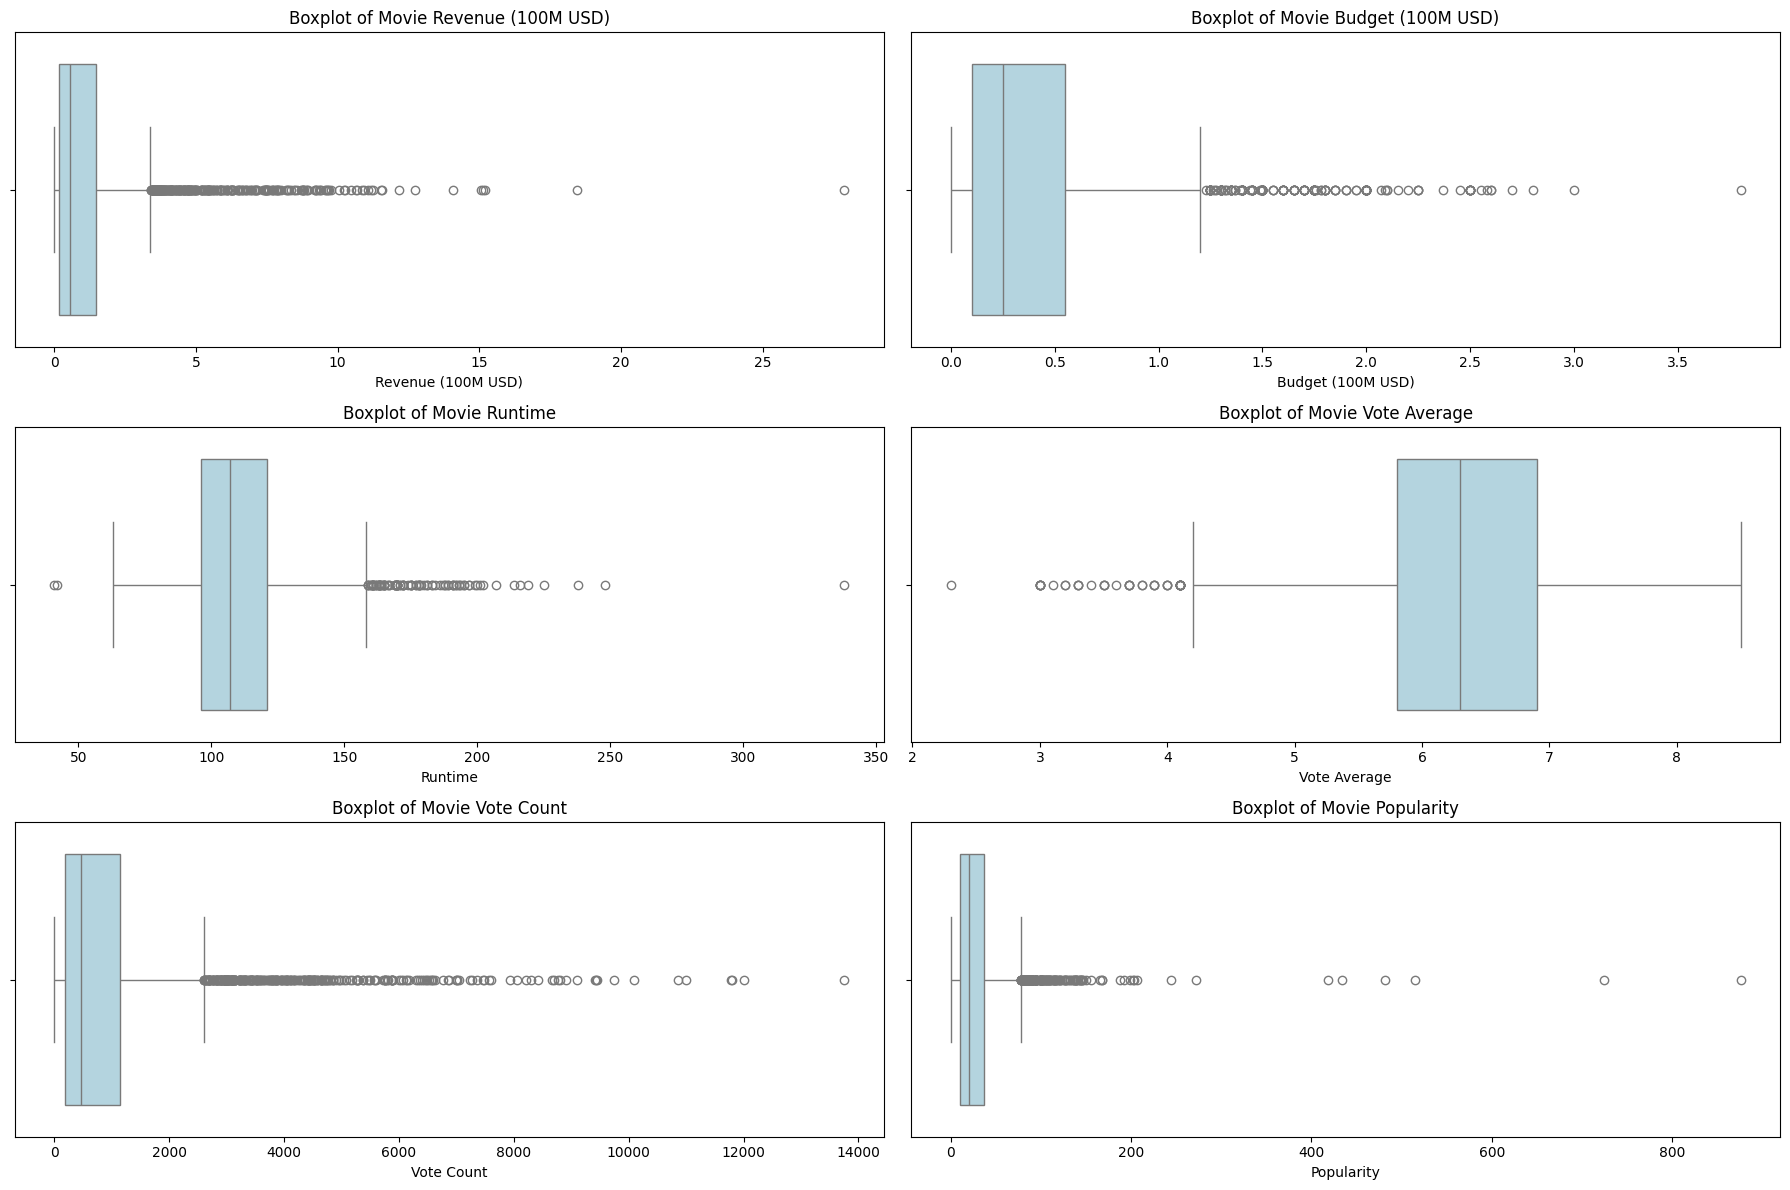

In [8]:
# Matplotlib의 pyplot 모듈을 plt라는 별칭으로 불러옴.
import matplotlib.pyplot as plt
# Matplotlib 기반의 시각화 라이브러리 Seaborn을 sns라는 별칭으로 불러옴.
import seaborn as sns

# 단위 변환: revenue, budget → 억 달러
movies_df_cleaned['revenue_(100M USD)'] = movies_df_cleaned['revenue'] / 1e8
movies_df_cleaned['budget_(100M USD)'] = movies_df_cleaned['budget'] / 1e8
# 'revenue', 'budget' 열의 값을 각각 1억으로 나누어 'revenue_(100M USD)', 'budget_(100M USD)'라는 새 열들을 추가하고, 향후 이 열들로 사용합니다.
# 그래프 해석의 직관성을 높이고자 단위를 변환하여 수익과 예산 컬럼을 1억 달러(100M USD) 단위로 변환하였습니다. 
# 그래프와 텍스트 해석 시 비교하기 쉬운 정보로 전달력을 높이고자 하였습니다.


# 변수와 이름 설정
feature_names = ['Revenue (100M USD)', 'Budget (100M USD)', 'Runtime', 'Vote Average', 'Vote Count', 'Popularity']
features = ['revenue_(100M USD)', 'budget_(100M USD)', 'runtime', 'vote_average', 'vote_count', 'popularity']

# Subplot으로 boxplot 시각화
plt.figure(figsize=(18, 12))
for i, (col, name) in enumerate(zip(features, feature_names)):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=movies_df_cleaned[col], color="lightblue")
    plt.title(f'Boxplot of Movie {name}')
    plt.xlabel(name)
# 초기에는 여러 변수에 대한 Boxplot을 개별적으로 생성했지만, 최종적으로는 plt.subplot()을 활용하여 6개의 Boxplot을 한 화면에 정렬하여 시각화했습니다. 
# 이러한 구조는 변수 간 분포를 한눈에 비교할 수 있게 하여 데이터 탐색의 효율성과 가독성을 크게 향상시킵니다.

# zip(features, feature_names): features와 feature_names 리스트의 각 요소를 짝지어 튜플의 시퀀스를 생성합니다. (예: ('runtime', 'Runtime'))
# enumerate(...): zip으로 생성된 각 튜플에 순서대로 인덱스(0부터 시작)를 부여합니다. (예: (0, ('runtime', 'Runtime')))
# for i, (col, name) in ...: enumerate로 생성된 각 (인덱스, 튜플) 쌍에 대해 반복합니다. i는 인덱스, col은 실제 열 이름, name은 표시용 이름이 됩니다.
# plt.subplot(3, 2, i+1): 전체 그림 영역을 3행 2열의 하위 그림(subplot) 그리드로 나누고, i+1번째 위치에 현재 그릴 하위 그림을 활성화합니다.
# sns.boxplot(x=movies_df_cleaned[col], color="lightblue"): movies_df_cleaned 데이터프레임의 현재 col에 해당하는 열 데이터를 사용하여 하늘색(lightblue) 박스플롯을 그립니다.
# plt.title(f'Boxplot of Movie {name}'): 현재 활성화된 하위 그림의 제목을 "Boxplot of Movie [표시용 이름]" 형식으로 설정합니다.

plt.tight_layout()
plt.show()


#### 3.2. 이상치 처리 여부 판단 (보너스)

(문제 해결 과정)

Winsorization은 극단값이 회귀 모델에 과도한 영향을 주어 예측 결과를 왜곡하는 문제를 완화하기 위한 방식입니다. 이는 이상치를 단순히 제거하는 대신, 데이터 구조를 보존하면서 모델의 안정성과 예측력을 높이는 전략으로 선택하게 되었습니다.
 
 - 처리 제외 및 보수적 처리 변수(평균 평점):
   
   평균 평점은 0~10 범위의 고정된 척도를 가지며, 분포 또한 평균과 중앙값이 거의 동일한 대칭적 형태를 보였습니다. 일부 낮은 평점은 실제 사용자 평점으로서 의미 있는 데이터이므로, 변환이 오히려 해석력을 떨어뜨릴 수 있어 Winsorization을 적용하지 않고 원 범위를 그대로 유지하였습니다.

 - 강건한 처리 변수 (수익, 예산, 상영시간, 투표 수, 인기도):
   
   수익, 예산, 투표 수, 인기도는 강한 우측 왜도와 긴 꼬리 분포를 보였으나, 상자 그림 분석 결과 하위 이상치는 관찰되지 않았습니다. 따라서 모델에 미치는 영향을 최소화하기 위해 하위 캡핑은 적용하지 않고 원본 최소값을 유지하며, 상위 10%의 극단값을 캡핑하였습니다. 이러한 캡핑(Capping)은 데이터의 극단적인 값(이상치)을 특정 상한선이나 하한선으로 제한하는 기법으로, 각 변수의 데이터 특성을 반영하면서도 회귀 모델의 안정성과 예측력을 확보하기 위한 균형 잡힌 처리 방식입니다.
   
   상영시간은 양쪽 꼬리에 이상치가 분포했지만, 이미 데이터 전처리 과정에서 40분 미만의 짧은 영화들이 제외되어 하위 캡핑은 적용하지 않고 원본 최소값을 유지하였습니다. 상위 이상치는 상업적 장편 영화의 사실상 상한선인 3시간을 반영하여 상위 1%만 캡핑했습니다. 

  - 결론:
   
    수익, 예산 등 우측 왜도가 큰 변수들은 극단값의 영향으로 평균과 중앙값의 차이가 컸습니다. 반면 상영시간과 평균 평점은 평균과 중앙값이 유사하고 분포가 안정적이었습니다. 이에 따라 왜도가 큰 변수 각각에 맞게 Winsorization을 적용하고, 안정적인 변수는 별도 처리 없이 원본을 유지했습니다. 이러한 변수별 맞춤형 이상치 처리를 통해 데이터 분포를 안정화하고 모델의 해석력 및 예측 안정성 향상을 위한 기반을 마련할 수 있었습니다.

In [9]:
# NumPy 및 SciPy 통계 함수를 가져옴.
import numpy as np
from scipy.stats import mstats

# Winsorization을 적용할 컬럼 목록 및 해당 임계값 정의
winsorization_configs = {
    'revenue_(100M USD)': {'lower_clip': 0.00, 'upper_clip': 0.10}, # 수익: 상위 10% 캡핑
    'budget_(100M USD)': {'lower_clip': 0.00, 'upper_clip': 0.10}, # 예산: 상위 10% 캡핑
    'vote_count': {'lower_clip': 0.00, 'upper_clip': 0.10}, # 투표 수: 상위 10% 캡핑
    'popularity': {'lower_clip': 0.00, 'upper_clip': 0.10}, # 인기도: 상위 10% 캡핑
    'runtime': {'lower_clip': 0.00, 'upper_clip': 0.01} # 상영시간: 상위 1% 캡핑
}
# 데이터의 특정 변수에 대해 윈저화(winsorization) 설정을 정의한 파이썬 딕셔너리입니다.
# 각 '키'는 윈저화를 적용할 변수명을 나타내며,
# 해당 '값'은 lower_clip과 upper_clip으로 구성된 또 다른 딕셔너리로,
# 변수별로 상·하위 몇 퍼센트를 잘라낼지 각각 다르게 지정할 수 있도록 설계되어 있습니다.
# 즉, 바깥 딕셔너리는 변수명 매핑용, 안쪽 딕셔너리는 각 변수의 클리핑 비율 설정용입니다.
# 주의) 아직 실제로 데이터에 캡핑이 적용된 것이 아님. 딕셔너리로 변수별 어떤 기준으로 캡핑할지를 정의해둔 기준표일 뿐임.

# 모든 처리 대상 컬럼을 포함하는 리스트 생성
all_processed_cols = list(winsorization_configs.keys()) + ['vote_average']
# 윈저화를 적용할 변수들(winsorization_configs.keys())을 리스트로 변환하고, 추가로 'vote_average' 변수도 포함시킵니다.
# 앞의 딕셔너리는 변수별 설정값을 저장하기 위한 구조였고, 이 리스트는 실제 처리 대상 변수명을 순서대로 담기 위한 용도입니다.

print("📊 <컬럼별 이상치 처리 전/후 요약 통계량>")

# --- 1. 이상치 처리 전 요약 통계량 출력 ---
print("\n--- 처리 전 요약 통계량 ---")
# describe()로 통계량 계산 후 'mean', '50%', 'std' 행만 선택하여 출력
display(movies_df_cleaned[all_processed_cols].describe().loc[['mean', '50%', 'std']])

# --- 2. 이상치 처리 로직 ---
# Winsorization 적용 컬럼들에 설정된 임계값으로 윈저라이징 수행
for col, config in winsorization_configs.items(): # 각 변수명(col)과 설정(config)을 순회하며 윈저화 적용 준비
    data_array = movies_df_cleaned[col].values # 원본 데이터에서 해당 변수의 값을 NumPy 배열로 추출 (mstats.winsorize가 배열을 필요로 함)
    winsorized_data = mstats.winsorize(data_array, # mstats.winsorize 함수로 윈저화 수행, 설정된 하위·상위 클리핑 비율을 limits로 전달
                                        limits=[config['lower_clip'], config['upper_clip']]) 
    winsorized_data = np.asarray(winsorized_data) # 윈저화 결과는 MaskedArray 형태이므로, 일반 NumPy 배열로 변환
    movies_df_cleaned.loc[:, col] = winsorized_data # 변환된 윈저화 데이터를 movies_df_cleaned의 해당 열에 덮어쓰기 (데이터 업데이트 완료)
# MaskedArray는 결측치나 마스킹된 값을 처리하는 NumPy 배열 확장형이며,
# DataFrame에 문제없이 저장하려면 일반 NumPy 배열로 변환해야 합니다.

# --- 3. 이상치 처리 후 요약 통계량 출력 ---
print("\n--- 처리 후 요약 통계량 ---")
# describe()로 통계량 계산 후 'mean', '50%', 'std' 행만 선택하여 출력
display(movies_df_cleaned[all_processed_cols].describe().loc[['mean', '50%', 'std']])

📊 <컬럼별 이상치 처리 전/후 요약 통계량>

--- 처리 전 요약 통계량 ---


,revenue_(100M USD),budget_(100M USD),vote_count,popularity,runtime,vote_average
mean,1.213181,0.406788,977.893090,29.051491,110.720793,6.313263
50%,0.551983,0.250000,471.000000,20.415572,107.000000,6.300000
std,1.863361,0.443997,1414.538507,36.169863,20.970364,0.859921



--- 처리 후 요약 통계량 ---


,revenue_(100M USD),budget_(100M USD),vote_count,popularity,runtime,vote_average
mean,0.957261,0.354347,782.791137,25.202472,110.514410,6.313263
50%,0.551983,0.250000,471.000000,20.415572,107.000000,6.300000
std,1.000036,0.302328,789.138367,18.064105,19.939043,0.859921


## 4. 시각화

#### 4.1. 산점도 그리기

(문제 해결 과정)

산점도에서 경계선에 점들이 밀집되어 보이는 현상은 Winsorization이 성공적으로 적용되어 극단값이 캡핑된 결과입니다. 이는 데이터의 범위가 안정화되고 모델 학습에 유리하도록 정제되었음을 시각적으로 보여줍니다.

  - 예산/수익
    
    윈저라이징으로 극단적인 예산과 수익의 영향을 완화하여 예산 0.8억 달러, 수익 3억 달러 부근에서 점들이 밀집되어 보입니다. 낮은 예산 구간에 데이터가 밀집하며, 예산 증가에 따라 수익의 분산이 커지는 이분산성을 보입니다. 즉, 예산과 수익은 양의 상관관계를 가지며, 예산이 높아질수록 수익의 예측 불확실성(분산)이 커집니다. (이분산성이란 오차의 분산이 일정하지 않은 현상을 의미함)

 - 상영시간/수익
   
   상영시간은 약 80분에서 180분 사이에 데이터가 집중되어 있습니다. 수익은 0억 달러에서 1억 달러 구간에 밀집되어 있으며, 상위 3억 달러 부근에 점들이 캡핑되어 수평선처럼 나타납니다. 상영시간과 수익 간의 뚜렷한 선형 관계는 관찰하기 어렵습니다.

 - 평균 평점/수익
   
   평균 평점은 특정 점수대에서 수직 띠를 형성하며, 수익은 3억 달러 부근에서 밀집됩니다. 평점이 높을수록 고수익 영화가 많아지는 경향이 있지만, 낮은 평점에도 고수익 영화가 일부 존재합니다. 수익의 윈저라이징 후에도 평균 평점과 수익 사이에 직접적인 선형 관계는 약합니다. 특정 평점 범위(5.5~7.5점)에서 고수익 영화가 집중되어 있습니다.

 - 투표 수/수익
   
    윈저라이징으로 극단적인 투표 수와 수익이 제어되어 투표 수 2500회, 수익 3억 달러 부근에서 점들이 밀집됩니다. 낮은 투표 수에서 데이터가 밀집하며, 투표 수 증가에 따라 수익 분산이 커지는 강한 이분산성을 보입니다. 투표 수는 수익과 매우 강한 양의 상관관계를 가지며, 투표 수가 많아질수록 수익의 예측 범위가 넓어집니다.

 - 인기도/수익
   
   윈저라이징으로 극단적인 인기도와 수익이 제어되어 인기도 60, 수익 3억 달러 부근에서 점들이 밀집됩니다. 낮은 인기도에서 데이터가 밀집하며, 인기도 증가에 따라 수익 분산이 커지는 강한 이분산성을 보입니다. 인기도는 수익과 강한 양의 상관관계를 가지며, 인기도가 높아질수록 수익의 예측 범위가 넓어지는 경향을 보입니다.

보충설명:
  - 수익을 설명하는 독립변수인 예산, 평균 평점, 투표 수는 값의 범위가 넓어, '윈저라이징' 적용 시 공통적으로 분산이 커져 예측의 불확실성을 키우는 단점이 있습니다. 값의 크기를 줄이고 분포를 안정화하는 '로그 변환'이 통계적 예측에는 더 적합할 수 있지만, 해석의 직관성과 단위의 현실성을 우선시해 윈저라이징을 선택했습니다. 이는 실무 초반 단계에서 해석 가능성에 비중을 둔 전략적 판단입니다.

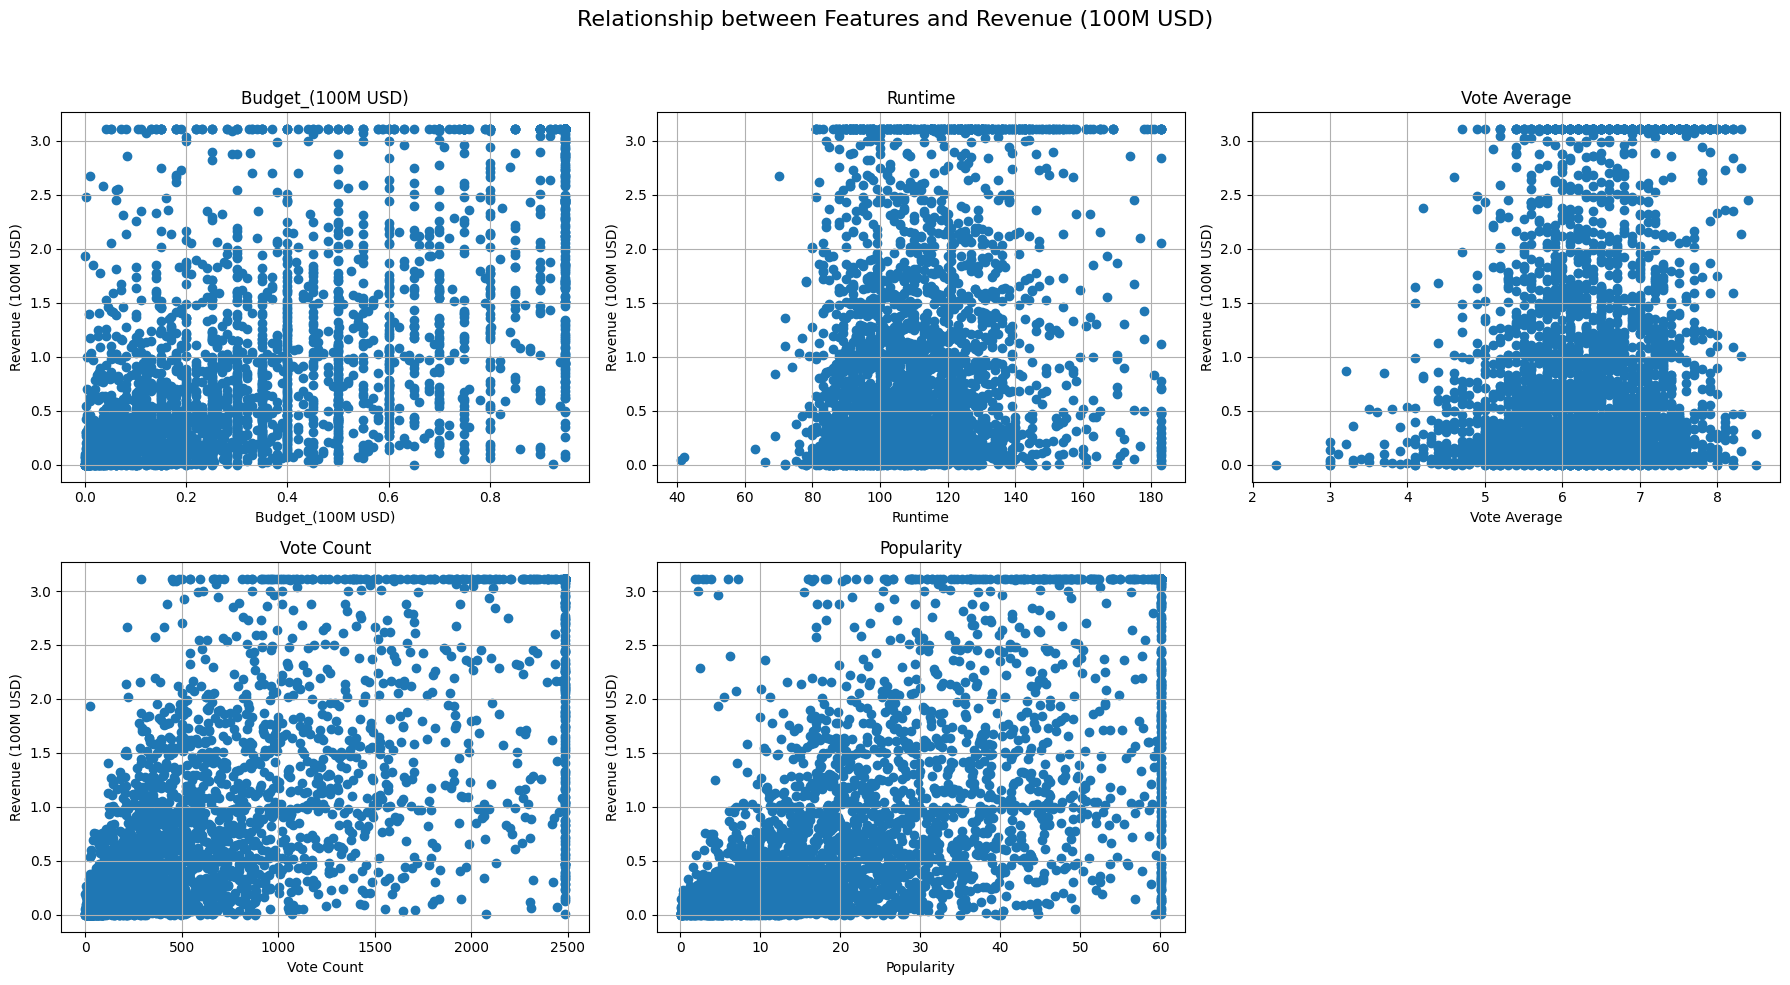

In [10]:
# 변수 리스트 및 제목 정의
features = ['budget_(100M USD)', 'runtime', 'vote_average', 'vote_count', 'popularity']
titles = ['Budget_(100M USD)', 'Runtime', 'Vote Average', 'Vote Count', 'Popularity']

# subplot으로 시각화
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Relationship between Features and Revenue (100M USD)', fontsize=16)

for i, (feature, title) in enumerate(zip(features, titles)):
    row, col = divmod(i, 3) # 2행 3열 구조에 맞게 subplot의 행(row)과 열(col) 인덱스를 계산 (plt.subplot 대신 axes 배열 접근용)
    axs[row, col].scatter(movies_df_cleaned[feature], movies_df_cleaned['revenue_(100M USD)']) 
    # 산점도는 x축(feature), y축(수익)의 두 변수 관계를 시각화하므로, axes 객체에 직접 scatter 호출
    axs[row, col].set_title(title) # 각 subplot에 해당 피처명을 제목으로 설정
    axs[row, col].set_xlabel(title) # x축 레이블은 해당 피처명으로 설정
    axs[row, col].set_ylabel('Revenue (100M USD)') # y축은 고정된 수익 컬럼으로 설정
    axs[row, col].grid(True) # 눈금선을 추가해 그래프 가독성 향상

# 마지막 subplot 비워두기
axs[1, 2].axis('off') # 2행 3열 중 마지막 빈 subplot(6번째)은 비워서 시각적으로 정돈

plt.tight_layout(rect=[0, 0, 1, 0.95]) # 전체 subplot 간 여백 조정 및 상단 제목 공간 확보
plt.show()

# 이전 plt.subplot() 구조와의 차이점:
# plt.subplot(3, 2, i+1) 구조는 간단하고, plt.subplots() + axs[row, col] 구조는 subplot을 배열처럼 다룰 수 있어 반복문 기반 시각화에 유리합니다.
# 특히 2D 레이아웃(row, col) 구조에서 산점도처럼 x/y축이 다른 여러 그래프를 비교할 때 훨씬 직관적입니다.

#### 4.2. 분포 확인

(문제 해결 과정)

각 입력 변수의 히스토그램을 분석하여 고유한 분포 특성을 파악했습니다. 이를 통해 변수별 데이터의 집중 경향, 왜도, 그리고 극단값의 존재 여부를 이해하고, 향후 모델링 및 분석에 활용될 데이터의 기초적인 특성을 확인하였습니다.

 - 예산
   
   가장 낮은 예산 구간(0~0.1억 달러)에 압도적으로 많은 영화가 몰려 있으며, 예산이 높아질수록 영화 수는 급격히 줄어들지만, 매우 높은 예산(0.8~0.9억 달러)까지 분포가 길게 이어집니다. 대부분의 영화는 적은 예산으로 제작되었으나, 소수의 블록버스터 영화는 극도로 많은 예산이 투입됨을 알 수 있습니다. 이는 예산 분포가 한쪽으로 심하게 치우쳐져 있음을 보여줍니다.

 - 상영시간
   
   상영시간은 약 90분에서 110분 사이에서 영화 빈도수가 가장 높게 나타나며, 이 구간을 기준으로 짧거나 긴 상영시간 쪽으로 갈수록 빈도수가 점진적으로 감소하는 분포를 보입니다. 40분, 180분 부근에서 극단값이 확인되지만, 빈도수가 낮습니다. 대부분 영화의 상영시간은 80분에서 140분 사이에 분포하고 있습니다.

 - 평균 평점
   
   6점대에서 7점대 초반에 영화 수가 가장 많고, 이 점수대를 기준으로 낮거나 높은 평점 쪽으로 갈수록 빈도수가 완만하게 줄어드는 종 모양에 가까운 분포입니다. 대부분의 영화는 중간에서 약간 높은 수준의 평점을 받으며, 매우 낮거나 높은 평점을 받는 영화는 드뭅니다. 평점 분포는 비교적 고른 중심 경향을 나타냅니다.

 - 투표 수
   
   가장 낮은 투표 수 구간(0~250)에 압도적으로 많은 영화가 집중되어 있으며, 투표 수가 늘어날수록 영화 수가 급격히 감소하다가 매우 높은 투표 수(2500)까지 길게 분포가 이어집니다. 대부분의 영화는 적은 투표를 받지만, 소수의 인기 영화는 매우 많은 투표 수를 기록합니다. 투표 수 분포는 한쪽으로 심하게 치우쳐져 있습니다.

 - 인기도
   
   가장 낮은 인기도 점수 구간(0~5)에 가장 많은 영화가 분포하며, 인기도가 높아질수록 빈도수는 급격히 줄어들고 매우 높은 인기도(60)까지 길게 분포가 이어집니다. 대부분의 영화는 낮은 인기도를 가지지만, 소수의 영화들이 매우 높은 인기도 점수를 기록합니다. 인기도 분포 역시 한쪽으로 심하게 치우쳐져 있습니다.

4-1. Feature Distribution Visualization


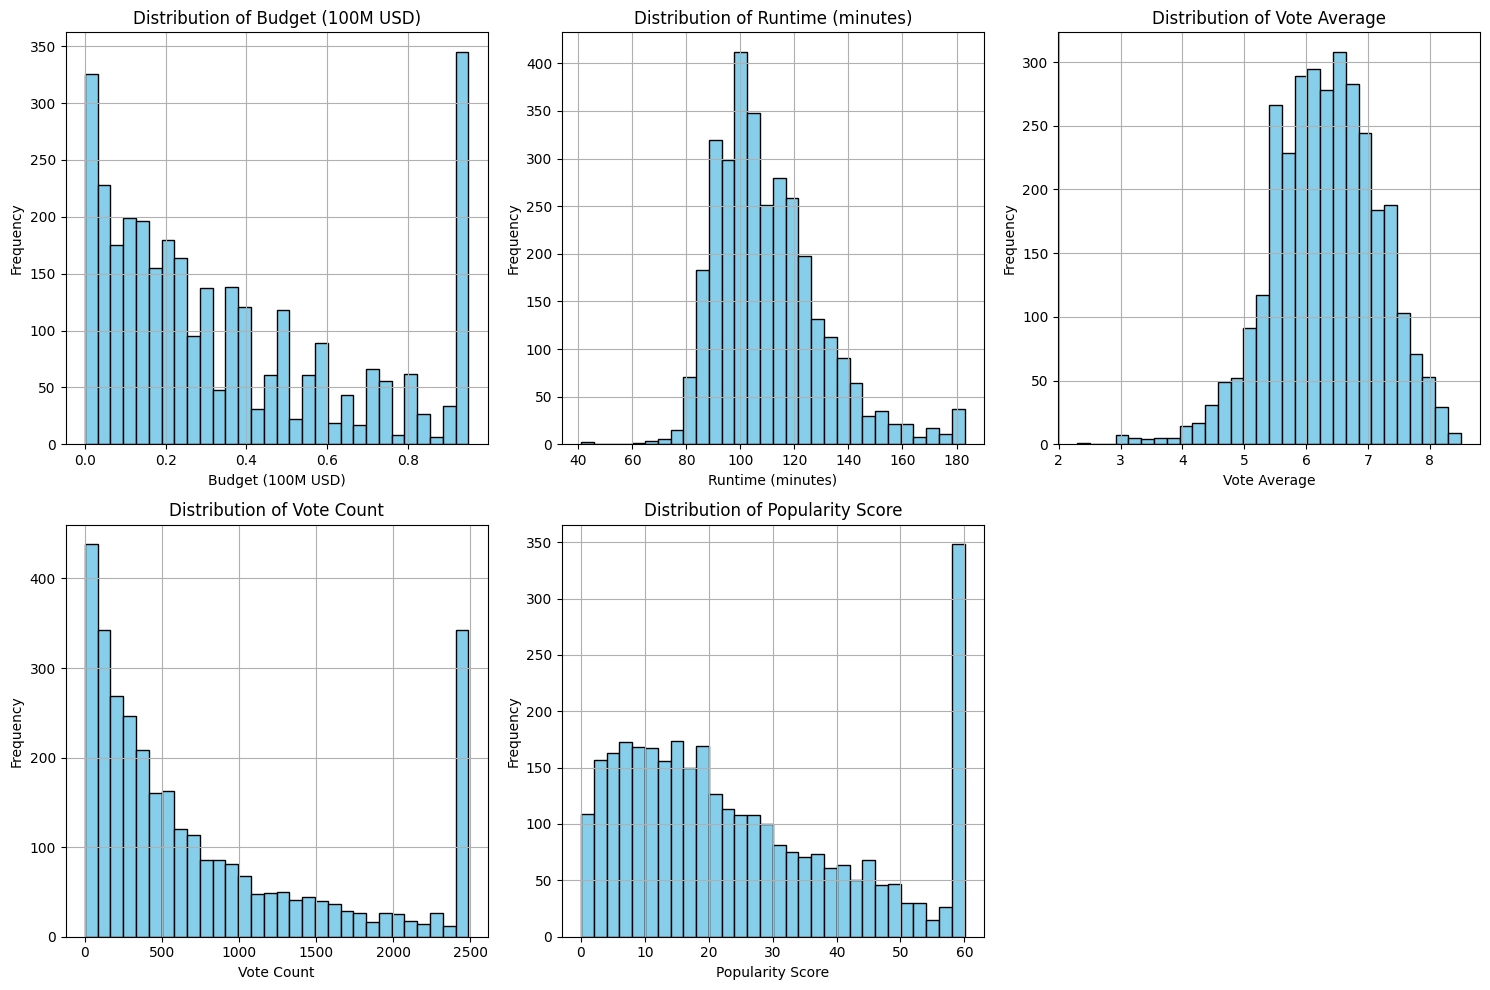

In [11]:
print('4-1. Feature Distribution Visualization')

# 각 입력 변수별 분포 시각화
features = ['budget_(100M USD)', 'runtime', 'vote_average', 'vote_count', 'popularity']
feature_titles = {
    'budget_(100M USD)': 'Budget (100M USD)',
    'runtime': 'Runtime (minutes)',
    'vote_average': 'Vote Average',
    'vote_count': 'Vote Count',
    'popularity': 'Popularity Score'
}
# features는 시각화 대상 컬럼 목록이고, feature_titles는 각 변수의 출력용 이름을 매핑한 딕셔너리입니다.
# 이 딕셔너리는 변수별로 시각화에 사용할 '레이블용 텍스트'를 지정하기 위한 용도로, 설정값을 담는 winsorization_configs와는 목적이 다릅니다.
# 즉, 이전 딕셔너리는 수치 기준값 설정용이었고, 여기는 그래프 출력 시 텍스트 표현을 제어하기 위한 매핑 구조입니다.

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    plt.hist(movies_df_cleaned[feature], bins=30, color='skyblue', edgecolor='black') 
    # boxplot과 달리, 각 변수의 분포(빈도)를 나타내는 히스토그램 생성
    # bins=30: 구간 개수 지정 → 분포를 좀 더 세밀하게 시각화
    plt.title(f'Distribution of {feature_titles[feature]}')
    plt.xlabel(feature_titles[feature])
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

# 이전 boxplot에서는 feature 이름과 출력명을 따로 다뤄야 해서 zip(features, feature_names)을 사용했지만,
# 여기서는 feature_titles 딕셔너리로 출력명을 직접 매핑하므로 zip 없이 features 리스트만으로 충분합니다.
# 즉, 시각화용 이름(title)은 루프 안에서 feature_titles[feature]로 접근하면 되기 때문에 구조가 더 단순해집니다.

## 5. 회귀분석

#### 단순 회귀모델 구축, 회귀계수 및 R² 해석, 단변량 회귀 t/F 통계량 해석

(문제 해결 과정)

텀 프로젝트의 궁극적인 목표는 영화 수익에 영향을 미치는 주요 요인들을 파악하고, 이를 통해 영화의 흥행을 예측하는 것이라 판단했습니다. 이전 단계에서 변수 간의 단순 상관관계를 파악했다면, 이번 회귀 분석을 통해서는 이러한 연관성을 넘어 각 요인이 수익에 미치는 잠재적인 인과 관계를 탐색하고 그 통계적 유의미성을 검증하고자 합니다. 이러한 분석 목표 도구로 statsmodels.api 라이브러리의 OLS(Ordinary Least Squares: 최소제곱법) 회귀 분석 클래스를 사용했습니다. OLS는 독립 변수와 종속 변수 간의 선형 관계를 효율적으로 모델링하며, 각 변수의 영향력을 직관적인 회귀계수로 보여주어 해석을 용이하게 해주었습니다.

먼저, 영화 수익(revenue)에 영향을 미칠 것으로 예상되는 예산, 상영시간, 평균 평점, 투표 수, 인기도 변수 각각에 대해 단순 회귀 모델을 구축하고 이후, 각 변수들에 대해 아래 항목들을 중심으로 해석을 진행했습니다.

 1. 회귀계수(기울기)
    
    의미: 회귀계수는 독립 변수가 1단위 증가할 때 종속 변수인 수익이 평균적으로 얼마나 변하는지 나타냅니다.
    예를 들어, '예산'의 회귀계수는 예산이 1억 달러 늘어날 때 수익이 약 2.2517억 달러 증가함을 의미합니다. 이처럼 각 변수의 회귀계수 부호로 영향의 방향을, 절대값으로 영향의 크기를 파악하여 특정 요인이 수익에 미치는 직접적인 영향을 설명합니다.
 
 2. 결정계수(R²)
   
    의미: 결정계수(R-squared)는 모델이 종속 변수(수익)의 총 변동 중 얼마나 많은 부분을 설명할 수 있는지를 나타내는 비율입니다. R²가 1에 가까울수록 모델의 설명력이 높다는 것을 의미합니다.
    예를 들어, 예산 모델의 R-squared가 0.463이라는 것은 수익 변동의 약 46.3%를 예산으로 설명 가능함을 뜻합니다. 이 지표는 모델이 수익 변화를 얼마나 설득력 있게 예측하는지 보여주는 모델의 전반적인 설명력을 평가하여 모델 적합도 검정에 사용됩니다.
 
 3. t-통계량 및 F-통계량(통계적 유의성 평가)
   
    의미: t-통계량의 p-값은 귀무가설(특정 입력변수의 회귀계수는 0이다, 즉 해당 입력변수는 종속변수에 영향을 주지 않는다)이 맞다고 가정할 때, 관측될 확률을 의미합니다. F-통계량의 p-값은 귀무가설(모든 입력변수의 회귀계수는 0이다, 즉 회귀모델 전체는 종속변수를 설명하는 데 유의미하지 않다)이 맞다고 가정할 때, 관측될 확률을 의미합니다.
   
    해석: p-값은 통상적인 유의수준 0.05보다 작으면 귀무가설을 기각하고, 해당 변수 또는 모델 전체가 통계적으로 유의미하다고 판단합니다. 이는 관측된 관계가 '단순한 우연이 아니며', 해당 변수 또는 모델이 수익 예측에 실질적인 의미가 있음을 시사합니다. 특히 단순 회귀에서는 독립변수가 하나이기 때문에 개별 변수의 유의성을 검정하는 t-통계량과 전체 모델의 유의성을 검정하는 F-통계량이 수학적으로 t² = F 관계로 연결되며, p-값도 동일하게 나타남을 확인했습니다.

종합 분석 및 시사점:

 각 독립 변수에 대한 단변량 회귀 분석 결과, 예산(R²=0.4634), 투표 수(R²=0.5392) 그리고 인기도(R²=0.4700)가 영화 수익 변동을 설명하는 데 있어 높은 설명력을 가지는 것으로 나타났습니다. 이 세 변수는 모두 p-값이 0.0000(반올림한 값)으로 통계적으로 매우 유의미하며, 수익과 강한 양의 선형 관계를 보였습니다.

 반면, 상영시간(R²=0.0489)과 평균 평점(R²=0.0291)은 통계적으로는 유의미하다고 나타났음에도 불구하고, 수익 변동을 설명하는 능력(R²)은 매우 미미한 수준에 그쳤습니다. 이는 이들 변수가 단독으로는 영화 수익을 예측하는 데 실질적인 기여가 작다는 것을 시사합니다.

 이러한 단변량 분석 결과는 영화 수익 예측에 있어 어떤 요인들이 더 중요하게 고려되어야 하는지에 대한 중요한 기초 자료를 제공합니다. 향후 최종 분석 단계인 다중 회귀 분석에서 설명력이 높은 변수들을 중심으로 다중 회귀 모델을 구축하여, 변수들 간의 복합적인 상호작용과 수익에 미치는 총체적인 영향을 파악할 것입니다.

In [12]:
# 회귀 분석 모델 구축을 위한 라이브러리
import statsmodels.api as sm # statsmodels 라이브러리를 'sm'이라는 별칭으로 가져옵니다. 주로 통계 모델 구축에 사용됩니다.

# 독립 변수(X)와 종속 변수(Y) 정의
X = movies_df_cleaned['budget_(100M USD)'] # 'movies_df_cleaned' DataFrame에서 'budget_(100M USD)' 열을 독립 변수 X로 선택합니다. X는 Pandas Series 형태가 됩니다.
Y = movies_df_cleaned['revenue_(100M USD)'] # 'movies_df_cleaned' DataFrame에서 'revenue_(100M USD)' 열을 종속 변수 Y로 선택합니다. Y는 Pandas Series 형태가 됩니다.

# 상수항(intercept) 추가
X = sm.add_constant(X) 
# OLS 모델에 절편(intercept) 또는 상수항을 추가합니다.
# 이는 회귀선이 원점(0,0)을 통과하지 않고 Y축과 교차할 수 있도록 해줍니다.
# 대부분의 현실 데이터에서 독립 변수가 0일 때 종속 변수도 반드시 0이라고 가정하기 어렵기 때문입니다.

# OLS (Ordinary Least Squares) 모델 학습
model_budget = sm.OLS(Y, X).fit() 
# 종속 변수 Y와 독립 변수 X를 사용하여 OLS(최소제곱법)의 모델 객체를 초기화합니다.
# 이 초기화 과정은 어떤 데이터로 어떤 종류의 회귀 모델을 만들 것인지를 `statsmodels` 라이브러리에 알려주는 단계입니다.
# 이후 .fit() 메서드를 호출하여 주어진 데이터에 가장 잘 맞는 회귀선, 즉 예측 오차의 제곱합을 최소화하는 최적의 회귀계수(기울기와 절편)를 찾아 모델을 학습(훈련)시킵니다.


# 모델 요약 결과 출력
print("--- Budget (예산, 1억 달러 단위)으로 Revenue 예측 모델 ---") 
print(model_budget.summary()) # 학습된 OLS 모델의 상세 통계 요약 결과를 출력합니다. 
# 이 결과에는 회귀계수, R-squared, P-value 등 다양한 통계량이 포함됩니다.


# Jupyter Notebook에서 Markdown 형식으로 텍스트를 표시하기 위한 설정 (시각적 구분용)
# model_budget 결과와 다음 코드의 출력이 잘리는 것을 방지하고 명확하게 구분하기 위해 사용됩니다.
from IPython.display import display, Markdown # IPython 환경에서 Markdown 텍스트를 표시하기 위해 필요한 함수들을 가져옵니다.
display(Markdown('[해석]')) # Markdown 형식으로 '[해석]'이라는 제목을 출력하여, 다음 내용이 모델 결과에 대한 해석임을 명시합니다.


# 주요 모델 통계량 출력 및 해석
print(f"회귀계수 (Budget_(100M USD)): {model_budget.params['budget_(100M USD)']:.3f}") 
print(f"결정계수 (R-squared): {model_budget.rsquared:.3f}") 
print("   - 회귀계수 해석: 예산이 1억 달러 증가할 때, 수익은 약 {:.3f} 억 달러 증가합니다.".format(model_budget.params['budget_(100M USD)'])) 
print("   - 결정계수 해석: 이 모델은 수익 변동의 약 {:.2%}를 예산으로 설명할 수 있습니다.".format(model_budget.rsquared))
# .params, .rsquared, .format() 메서드 사용 설명
# model_budget.params: 학습된 OLS 모델의 각 회귀 계수(기울기 및 절편)를 담고 있는 Series 객체에서 특정 변수의 계수 값을 추출하는 데 사용됩니다. 양의 값일 경우 독립 변수 증가에 따른 종속 변수의 증가를 나타냅니다.
# model_budget.rsquared: 학습된 OLS 모델의 결정계수(R-squared) 값을 직접 추출하는 데 사용됩니다. 이 값은 모델이 종속 변수의 분산을 얼마나 잘 설명하는지 나타냅니다.
# .format(): 파이썬 문자열 포매팅 메서드로, 출력 문자열에 변수 값을 삽입하는 데 활용됩니다. f-string(`f"..."`)과 유사하나, `format()`은 문자열 뒤에 `.format(변수)` 형태로 사용되어 명시적인 호출 방식에서 차이가 있습니다.

# 통계적 유의성 평가
print("\n[통계적 유의성 평가]")
p_value_budget = model_budget.pvalues['budget_(100M USD)'] 
# 독립 변수 'budget_(100M USD)'에 대한 p-value(유의확률)를 추출합니다. 이 p-value는 해당 변수의 t-통계량으로부터 도출되며, 회귀계수가 통계적으로 유의미한지 판단하는 데 사용됩니다.
p_value_f_stat = model_budget.f_pvalue 
# 모델 전체의 통계적 유의성을 평가하는 F-통계량에 대한 p-value(유의확률)를 추출합니다. 이 값은 모델이 종속 변수를 설명하는 데 전반적으로 유의미한지 판단합니다.

# p-값에 따른 통계적 유의성 판단을 if-else 문을 활용하여 명확한 경우의 수로 해석 제시
print(f"  - Budget_(100M USD) 변수의 p-값 (P>|t|): {p_value_budget:.3f}")
if p_value_budget < 0.05:
    print("    -> p-값이 0.05보다 작으므로, 예산 변수는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)")
else:
    print("    -> p-값이 0.05보다 크므로, 예산 변수는 수익 예측에 통계적으로 유의미하지 않습니다. (귀무가설 기각 실패)")

print(f"  - 모델 전체의 F-통계량 p-값 (Prob (F-statistic)): {p_value_f_stat:.3f}")
if p_value_f_stat < 0.05:
    print("    -> p-값이 0.05보다 작으므로, 모델 전체는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)")
else:
    print("    -> p-값이 0.05보다 크므로, 모델 전체는 수익 예측에 통계적으로 유의미하지 않습니다. (귀무가설 기각 실패)")
print("  - 예산과 수익은 강한 양의 선형 관계를 가지며, 통계적으로도 매우 유의미하게 수익 예측에 상당한 영향을 미칩니다.")


--- Budget (예산, 1억 달러 단위)으로 Revenue 예측 모델 ---
                            OLS Regression Results                            
Dep. Variable:     revenue_(100M USD)   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     2785.
Date:                Wed, 04 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:05:59   Log-Likelihood:                -3574.2
No. Observations:                3227   AIC:                             7152.
Df Residuals:                    3225   BIC:                             7165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

[해석]

회귀계수 (Budget_(100M USD)): 2.252
결정계수 (R-squared): 0.463
   - 회귀계수 해석: 예산이 1억 달러 증가할 때, 수익은 약 2.252 억 달러 증가합니다.
   - 결정계수 해석: 이 모델은 수익 변동의 약 46.34%를 예산으로 설명할 수 있습니다.

[통계적 유의성 평가]
  - Budget_(100M USD) 변수의 p-값 (P>|t|): 0.000
    -> p-값이 0.05보다 작으므로, 예산 변수는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)
  - 모델 전체의 F-통계량 p-값 (Prob (F-statistic)): 0.000
    -> p-값이 0.05보다 작으므로, 모델 전체는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)
  - 예산과 수익은 강한 양의 선형 관계를 가지며, 통계적으로도 매우 유의미하게 수익 예측에 상당한 영향을 미칩니다.


In [13]:
X = movies_df_cleaned['runtime']
Y = movies_df_cleaned['revenue_(100M USD)']

X = sm.add_constant(X)
model_runtime = sm.OLS(Y, X).fit()

print("\n--- Runtime (상영시간)으로 Revenue 예측 모델 ---")
print(model_runtime.summary())

from IPython.display import display, Markdown
display(Markdown('[해석]'))
print(f"회귀계수 (Runtime): {model_runtime.params['runtime']:.3f}")
print(f"결정계수 (R-squared): {model_runtime.rsquared:.3f}")
print("  - 회귀계수 해석: 상영시간이 1분 증가할 때, 수익은 약 {:.3f} 억 달러 변화합니다.".format(model_runtime.params['runtime']))
print("  - 결정계수 해석: 이 모델은 수익 변동의 약 {:.2%}만을 상영시간으로 설명할 수 있습니다.".format(model_runtime.rsquared))

# 통계적 유의성 평가
print("\n[통계적 유의성 평가]")
p_value_runtime = model_runtime.pvalues['runtime']
p_value_f_stat = model_runtime.f_pvalue

print(f"  - Runtime 변수의 p-값 (P>|t|): {p_value_runtime:.3f}")
if p_value_runtime < 0.05:
    print("    -> p-값이 0.05보다 작으므로, 상영시간 변수는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)")
else:
    print("    -> p-값이 0.05보다 크므로, 상영시간 변수는 수익 예측에 통계적으로 유의미하지 않습니다. (귀무가설 기각 실패)")

print(f"  - 모델 전체의 F-통계량 p-값 (Prob (F-statistic)): {p_value_f_stat:.3f}")
if p_value_f_stat < 0.05:
    print("    -> p-값이 0.05보다 작으므로, 모델 전체는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)")
else:
    print("    -> p-값이 0.05보다 크므로, 모델 전체는 수익 예측에 통계적으로 유의미하지 않습니다. (귀무가설 기각 실패)")
print("  - 상영시간과 수익 간에는 유의미한 선형 관계가 매우 약하며, 통계적으로도 유의미하지 않을 수 있어 상영시간만으로는 수익을 잘 예측하기 어렵습니다.")


--- Runtime (상영시간)으로 Revenue 예측 모델 ---
                            OLS Regression Results                            
Dep. Variable:     revenue_(100M USD)   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     165.9
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           4.59e-37
Time:                        18:05:59   Log-Likelihood:                -4497.6
No. Observations:                3227   AIC:                             8999.
Df Residuals:                    3225   BIC:                             9011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

[해석]

회귀계수 (Runtime): 0.011
결정계수 (R-squared): 0.049
  - 회귀계수 해석: 상영시간이 1분 증가할 때, 수익은 약 0.011 억 달러 변화합니다.
  - 결정계수 해석: 이 모델은 수익 변동의 약 4.89%만을 상영시간으로 설명할 수 있습니다.

[통계적 유의성 평가]
  - Runtime 변수의 p-값 (P>|t|): 0.000
    -> p-값이 0.05보다 작으므로, 상영시간 변수는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)
  - 모델 전체의 F-통계량 p-값 (Prob (F-statistic)): 0.000
    -> p-값이 0.05보다 작으므로, 모델 전체는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)
  - 상영시간과 수익 간에는 유의미한 선형 관계가 매우 약하며, 통계적으로도 유의미하지 않을 수 있어 상영시간만으로는 수익을 잘 예측하기 어렵습니다.


In [14]:
X = movies_df_cleaned['vote_average']
Y = movies_df_cleaned['revenue_(100M USD)']

X = sm.add_constant(X)
model_vote_average = sm.OLS(Y, X).fit()

print("\n--- Vote Average (평균 평점)으로 Revenue 예측 모델 ---")
print(model_vote_average.summary())

from IPython.display import display, Markdown
display(Markdown('[해석]'))
print(f"회귀계수 (Vote Average): {model_vote_average.params['vote_average']:.3f}")
print(f"결정계수 (R-squared): {model_vote_average.rsquared:.3f}")
print("  - 회귀계수 해석: 평균 평점이 1점 증가할 때, 수익은 약 {:.3f} 억 달러 증가합니다.".format(model_vote_average.params['vote_average']))
print("  - 결정계수 해석: 이 모델은 수익 변동의 약 {:.2%}를 평균 평점으로 설명할 수 있습니다.".format(model_vote_average.rsquared))

# 통계적 유의성 평가
print("\n[통계적 유의성 평가]")
p_value_vote_average = model_vote_average.pvalues['vote_average']
p_value_f_stat = model_vote_average.f_pvalue

print(f"  - Vote Average 변수의 p-값 (P>|t|): {p_value_vote_average:.3f}")
if p_value_vote_average < 0.05:
    print("    -> p-값이 0.05보다 작으므로, 평균 평점 변수는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)")
else:
    print("    -> p-값이 0.05보다 크므로, 평균 평점 변수는 수익 예측에 통계적으로 유의미하지 않습니다. (귀무가설 기각 실패)")

print(f"  - 모델 전체의 F-통계량 p-값 (Prob (F-statistic)): {p_value_f_stat:.3f}")
if p_value_f_stat < 0.05:
    print("    -> p-값이 0.05보다 작으므로, 모델 전체는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)")
else:
    print("    -> p-값이 0.05보다 크므로, 모델 전체는 수익 예측에 통계적으로 유의미하지 않습니다. (귀무가설 기각 실패)")
print("  - 평균 평점과 수익 간에는 약한 양의 선형 관계가 존재하지만, 통계적으로는 유의미하게 수익 변동을 설명하는 데 기여합니다.")


--- Vote Average (평균 평점)으로 Revenue 예측 모델 ---
                            OLS Regression Results                            
Dep. Variable:     revenue_(100M USD)   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     96.62
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           1.73e-22
Time:                        18:05:59   Log-Likelihood:                -4530.9
No. Observations:                3227   AIC:                             9066.
Df Residuals:                    3225   BIC:                             9078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
co

[해석]

회귀계수 (Vote Average): 0.198
결정계수 (R-squared): 0.029
  - 회귀계수 해석: 평균 평점이 1점 증가할 때, 수익은 약 0.198 억 달러 증가합니다.
  - 결정계수 해석: 이 모델은 수익 변동의 약 2.91%를 평균 평점으로 설명할 수 있습니다.

[통계적 유의성 평가]
  - Vote Average 변수의 p-값 (P>|t|): 0.000
    -> p-값이 0.05보다 작으므로, 평균 평점 변수는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)
  - 모델 전체의 F-통계량 p-값 (Prob (F-statistic)): 0.000
    -> p-값이 0.05보다 작으므로, 모델 전체는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)
  - 평균 평점과 수익 간에는 약한 양의 선형 관계가 존재하지만, 통계적으로는 유의미하게 수익 변동을 설명하는 데 기여합니다.


In [15]:
X = movies_df_cleaned['vote_count']
Y = movies_df_cleaned['revenue_(100M USD)']

X = sm.add_constant(X)
model_vote_count = sm.OLS(Y, X).fit()

print("\n--- Vote Count (투표 수)으로 Revenue 예측 모델 ---")
print(model_vote_count.summary())

from IPython.display import display, Markdown
display(Markdown('[해석]'))
print(f"회귀계수 (Vote Count): {model_vote_count.params['vote_count']:.3f}")
print(f"결정계수 (R-squared): {model_vote_count.rsquared:.3f}")
print("  - 회귀계수 해석: 투표 수가 1단위 증가할 때, 수익은 약 {:.3f} 억 달러 증가합니다.".format(model_vote_count.params['vote_count']))
print("  - 결정계수 해석: 이 모델은 수익 변동의 약 {:.2%}를 투표 수로 설명할 수 있습니다.".format(model_vote_count.rsquared))

# 통계적 유의성 평가
print("\n[통계적 유의성 평가]")
p_value_vote_count = model_vote_count.pvalues['vote_count']
p_value_f_stat = model_vote_count.f_pvalue

print(f"  - Vote Count 변수의 p-값 (P>|t|): {p_value_vote_count:.3f}")
if p_value_vote_count < 0.05:
    print("    -> p-값이 0.05보다 작으므로, 투표 수 변수는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)")
else:
    print("    -> p-값이 0.05보다 크므로, 투표 수 변수는 수익 예측에 통계적으로 유의미하지 않습니다. (귀무가설 기각 실패)")

print(f"  - 모델 전체의 F-통계량 p-값 (Prob (F-statistic)): {p_value_f_stat:.3f}")
if p_value_f_stat < 0.05:
    print("    -> p-값이 0.05보다 작으므로, 모델 전체는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)")
else:
    print("    -> p-값이 0.05보다 크므로, 모델 전체는 수익 예측에 통계적으로 유의미하지 않습니다. (귀무가설 기각 실패)")
print("  - 투표 수와 수익은 강한 양의 선형 관계를 가지며, 통계적으로도 매우 유의미하게 수익 예측에 상당한 영향을 미칩니다.")


--- Vote Count (투표 수)으로 Revenue 예측 모델 ---
                            OLS Regression Results                            
Dep. Variable:     revenue_(100M USD)   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     3773.
Date:                Wed, 04 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:05:59   Log-Likelihood:                -3328.6
No. Observations:                3227   AIC:                             6661.
Df Residuals:                    3225   BIC:                             6673.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

[해석]

회귀계수 (Vote Count): 0.001
결정계수 (R-squared): 0.539
  - 회귀계수 해석: 투표 수가 1단위 증가할 때, 수익은 약 0.001 억 달러 증가합니다.
  - 결정계수 해석: 이 모델은 수익 변동의 약 53.92%를 투표 수로 설명할 수 있습니다.

[통계적 유의성 평가]
  - Vote Count 변수의 p-값 (P>|t|): 0.000
    -> p-값이 0.05보다 작으므로, 투표 수 변수는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)
  - 모델 전체의 F-통계량 p-값 (Prob (F-statistic)): 0.000
    -> p-값이 0.05보다 작으므로, 모델 전체는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)
  - 투표 수와 수익은 강한 양의 선형 관계를 가지며, 통계적으로도 매우 유의미하게 수익 예측에 상당한 영향을 미칩니다.


In [16]:
X = movies_df_cleaned['popularity']
Y = movies_df_cleaned['revenue_(100M USD)']

X = sm.add_constant(X)
model_popularity = sm.OLS(Y, X).fit()

print("\n--- Popularity (인기도)로 Revenue 예측 모델 ---")
print(model_popularity.summary())

from IPython.display import display, Markdown
display(Markdown('[해석]'))
print(f"회귀계수 (Popularity): {model_popularity.params['popularity']:.3f}")
print(f"결정계수 (R-squared): {model_popularity.rsquared:.3f}")
print("  - 회귀계수 해석: 인기도가 1단위 증가할 때, 수익은 약 {:.3f} 억 달러 증가합니다.".format(model_popularity.params['popularity']))
print("  - 결정계수 해석: 이 모델은 수익 변동의 약 {:.2%}를 인기도로 설명할 수 있습니다.".format(model_popularity.rsquared))

# 통계적 유의성 평가
print("\n[통계적 유의성 평가]")
p_value_popularity = model_popularity.pvalues['popularity']
p_value_f_stat = model_popularity.f_pvalue

print(f"  - Popularity 변수의 p-값 (P>|t|): {p_value_popularity:.3f}")
if p_value_popularity < 0.05:
    print("    -> p-값이 0.05보다 작으므로, 인기도 변수는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)")
else:
    print("    -> p-값이 0.05보다 크므로, 인기도 변수는 수익 예측에 통계적으로 유의미하지 않습니다. (귀무가설 기각 실패)")

print(f"  - 모델 전체의 F-통계량 p-값 (Prob (F-statistic)): {p_value_f_stat:.3f}")
if p_value_f_stat < 0.05:
    print("    -> p-값이 0.05보다 작으므로, 모델 전체는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)")
else:
    print("    -> p-값이 0.05보다 크므로, 모델 전체는 수익 예측에 통계적으로 유의미하지 않습니다. (귀무가설 기각 실패)")
print("  - 인기도와 수익은 강한 양의 선형 관계를 가지며, 통계적으로도 매우 유의미하게 수익 예측에 상당한 영향을 미칩니다.")


--- Popularity (인기도)로 Revenue 예측 모델 ---
                            OLS Regression Results                            
Dep. Variable:     revenue_(100M USD)   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     2860.
Date:                Wed, 04 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:05:59   Log-Likelihood:                -3554.0
No. Observations:                3227   AIC:                             7112.
Df Residuals:                    3225   BIC:                             7124.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

[해석]

회귀계수 (Popularity): 0.038
결정계수 (R-squared): 0.470
  - 회귀계수 해석: 인기도가 1단위 증가할 때, 수익은 약 0.038 억 달러 증가합니다.
  - 결정계수 해석: 이 모델은 수익 변동의 약 47.00%를 인기도로 설명할 수 있습니다.

[통계적 유의성 평가]
  - Popularity 변수의 p-값 (P>|t|): 0.000
    -> p-값이 0.05보다 작으므로, 인기도 변수는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)
  - 모델 전체의 F-통계량 p-값 (Prob (F-statistic)): 0.000
    -> p-값이 0.05보다 작으므로, 모델 전체는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)
  - 인기도와 수익은 강한 양의 선형 관계를 가지며, 통계적으로도 매우 유의미하게 수익 예측에 상당한 영향을 미칩니다.


## 6. 선택 미션: 다변량 분석 시도 (보너스)

#### 다중회귀모델 구축 및 R² 비교, 다변량 회귀 t/F 통계량 해석

(문제 해결 과정)

텀 프로젝트의 궁극적인 목표는 영화 수익에 영향을 미치는 주요 요인들을 파악하고, 이를 통해 영화의 흥행을 예측하는 것입니다. 바로 전단계에서 단변량 회귀 분석을 통해 각 독립 변수가 영화 수익에 미치는 개별적인 영향을 파악했으며, 종합 분석 및 시사점을 통해 높은 설명력(R² 값)을 보인 예산, 투표 수, 인기도 변수 3개를 최종적으로 선정했습니다. 이는 5개의 후보 변수 중 수익 변동을 설명하는 데 가장 실질적인 기여를 한 것으로 판단했기 때문입니다.

이처럼 합리적인 기준에 따라 선정된 주요 변수들을 종합적으로 고려하여 다중 회귀 모델(Multiple Regression Model)을 구축하였고, 이를 기반으로 변수들이 함께 수익 변동을 얼마나 잘 설명하는지 분석했습니다. 아래와 같이 변수들에 대한 중점적 분석 항목을 확인합니다.

 1. 회귀계수(기울기)

     예산(1억 달러 단위) 회귀계수: 1.3863
     - 다른 모든 변수(투표 수, 인기도)를 통제한 상태에서, 영화 예산이 1억 달러 증가하면 영화 수익은 약 1.3863억 달러 증가합니다.
     
     투표 수 회귀계수: 0.0006
     - 다른 모든 변수(예산, 인기도)를 통제한 상태에서, 영화 투표 수가 1단위 증가하면 영화 수익은 약 0.0006억 달러 증가합니다.
     
     인기도 회귀계수: 0.0037
     - 다른 모든 변수(예산, 투표 수)를 통제한 상태에서, 영화 인기도가 1단위 증가하면 영화 수익은 약 0.0037억 달러 증가합니다.

 2. 결정계수(R²)
    
     결정계수(R²): 0.675
     - 이 다중 회귀 모델은 영화 수익 변동의 약 67.5%를 예산, 투표 수, 인기도 변수들의 조합으로 설명할 수 있습니다. 이는 각 변수를 단독으로 사용했을 때보다 높은 설명력을 가지며, 이 변수들의 조합이 수익 예측에 효과적임을 시사합니다.

 3. t-통계량 및 F-통계량(통계적 유의성 평가)
    
     - 개별 입력 변수의 통계적 유의성 (P>|t|):
         
         예산(1억 달러 단위) 변수 p-값: 0.000
         - p-값이 0.05보다 작으므로, 예산 변수는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)
         
         투표 수 변수 p-값: 0.000
         - p-값이 0.05보다 작으므로, 투표 수 변수는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)
         
         인기도 변수 p-값: 0.003
         - p-값이 0.05보다 작으므로, 인기도 변수는 수익 예측에 통계적으로 유의미합니다. (귀무가설 기각)
     
     - 모델 전체의 F-통계량 유의성 (Prob (F-statistic)):
         
         Prob (F-statistic): 0.000
         - 이 p-값이 0.05보다 훨씬 작으므로, 구축된 다중 회귀 모델 전체는 영화 수익 예측에 통계적으로 매우 유의미합니다. (귀무가설 기각)

종합 분석 및 시사점:
 
 본 다중 회귀 모델은 예산, 투표 수, 인기도라는 세 가지 핵심 변수를 통해 영화 수익을 예측하였습니다.

 모델 분석 결과, 각 변수의 회귀계수는 모두 양의 값을 가지며, 이는 이들 요인이 증가할수록 영화 수익도 함께 증가하는 긍정적인 관계임을 시사합니다. 또한, 개별 변수의 t-통계량 p-값과 모델 전체의 F-통계량 p-값이 모두 통계적으로 매우 유의미하게 나타나, 관측된 관계가 단순한 우연이 아님을 강력히 뒷받침합니다.
 모델의 결정계수(R-squared)는 0.675로, 이는 이전 분석에서 각 변수를 단독으로 사용했던 단변량 모델의 개별 결정계수(예산 0.463, 투표 수 0.539, 인기도 0.470)보다 현저히 높아졌습니다. 이 변수들이 함께 영화 수익 변동의 약 67.5%를 설명할 수 있음을 강력하게 보여주며, 이 변수들의 조합이 수익 예측에 매우 효과적임을 시사합니다.

 이러한 분석 결과는 영화 수익에 가장 큰 영향을 미치는 요인들을 종합적으로 이해하고, 여러 요인이 복합적으로 작용하는 실제 흥행 요소를 모델에 반영했다는 점에서 의미가 있습니다.

 궁극적으로 본 회귀 분석 결과는 영화 흥행 성공을 위한 실질적인 전략 수립에 기여합니다. 핵심 요인인 예산, 인기도, 투표 수를 고려할 때, 영화 제작 시 적정 예산 투입이 중요합니다(예산 1억 달러 증가 시 수익 약 1.3863억 달러 증가). 또한, 인기도 1단위는 수익 약 37만 달러, 투표 수 1단위는 약 6만 달러 증가 효과를 보이므로, 개봉 전후 대중의 관심과 참여를 유도하는 마케팅 및 배급 전략이 필수적입니다. 다만, 예산, 인기도, 투표 수가 높아질수록 수익 예측의 불확실성이 커지는 이분산성을 고려하여 전략적 접근이 필요합니다. 종합적으로 양질의 콘텐츠를 충분한 예산으로 제작하고 효과적으로 홍보하는 것이 영화 흥행 성공의 핵심임을 본 분석은 강력하게 시사합니다.


In [17]:
# 다중 회귀 모델의 독립변수 (X) 정의
# 선정한 변수들: 'budget_(100M USD)', 'vote_count', 'popularity'
X_multi = movies_df_cleaned[['budget_(100M USD)', 'vote_count', 'popularity']]
Y_multi = movies_df_cleaned['revenue_(100M USD)']

# 상수항(절편) 추가
X_multi = sm.add_constant(X_multi)

# OLS (Ordinary Least Squares) 다중 회귀 모델 구축 및 학습
model_multi = sm.OLS(Y_multi, X_multi).fit()

# 결과 요약 출력
print("--- 다중 회귀 모델: Budget, Vote Count, Popularity로 Revenue 예측 ---")
print(model_multi.summary())

--- 다중 회귀 모델: Budget, Vote Count, Popularity로 Revenue 예측 ---
                            OLS Regression Results                            
Dep. Variable:     revenue_(100M USD)   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     2236.
Date:                Wed, 04 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:05:59   Log-Likelihood:                -2762.6
No. Observations:                3227   AIC:                             5533.
Df Residuals:                    3223   BIC:                             5558.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------